In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# To change the default values
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)

import seaborn as sns

In [3]:
target = pd.read_csv('../data/train_labels_1.csv')
# print target.shape
# print target.describe()
# print target['heart_disease_mortality_per_100k'].count()
# print target.median()

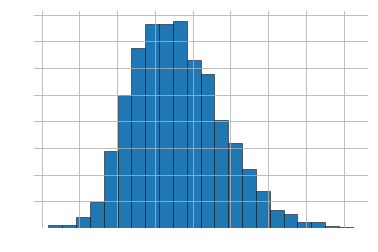

In [4]:
plt.hist(target['heart_disease_mortality_per_100k'], bins=22, edgecolor='black',linewidth=0.5)
plt.grid(True)
plt.show()

In [5]:
x = pd.read_csv('../data/train_values.csv')
y = pd.read_csv('../data/train_labels.csv')
dataset = x.join(y.set_index('row_id'), on='row_id',how='inner')
print dataset.isnull().sum()
#print x['area__rucc'][3][0:8]    
#x['area__rucc'] = x['area__rucc'].map({'Metro - Counties in metro areas of fewer than 250,000 population':0,'Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area':1})
#print x['area__rucc']

# for ix in range(len(x)):
#     if x['area__rucc'][ix][0:5] == 'Metro':
#         x['area__rucc'][ix] = '0'
#     if x['area__rucc'][ix][0:8] == 'Nonmetro':
#         x['area__rucc'][ix] = '1'
# print x['area_rucc']
# # Metro vs Mortality Rate

row_id                                                 0
area__rucc                                             0
area__urban_influence                                  0
econ__economic_typology                                0
econ__pct_civilian_labor                               0
econ__pct_unemployment                                 0
econ__pct_uninsured_adults                             2
econ__pct_uninsured_children                           2
demo__pct_female                                       2
demo__pct_below_18_years_of_age                        2
demo__pct_aged_65_years_and_older                      2
demo__pct_hispanic                                     2
demo__pct_non_hispanic_african_american                2
demo__pct_non_hispanic_white                           2
demo__pct_american_indian_or_alaskan_native            2
demo__pct_asian                                        2
demo__pct_adults_less_than_a_high_school_diploma       0
demo__pct_adults_with_high_scho

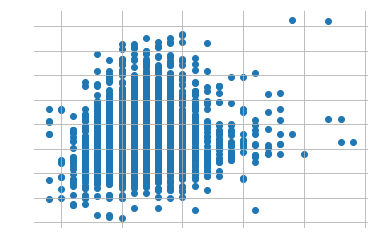

Correlation between Birth rate and Morality rate is: 0.142176


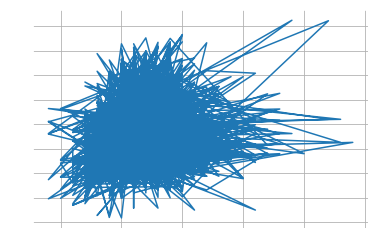

In [6]:
# Birth Rate vs Mortality Rate
a = dataset['demo__birth_rate_per_1k']
b = dataset['heart_disease_mortality_per_100k'] 
plt.grid(True)
plt.scatter(a,b)
plt.show()
print 'Correlation between Birth rate and Morality rate is: %f' %a.corr(b)

plt.plot(a,b)
plt.grid(True)
plt.show()

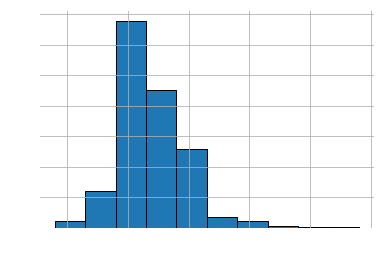

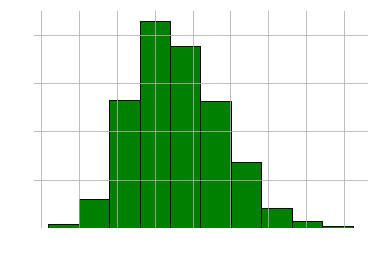

In [7]:
plt.grid(True)
plt.xlabel('demo__birth_rate_per_1k')
plt.hist(a, edgecolor='k')
plt.show()

plt.grid(True)
plt.xlabel('heart_disease_mortality_per_100k')
plt.hist(b, edgecolor='k',color='g')
plt.show()

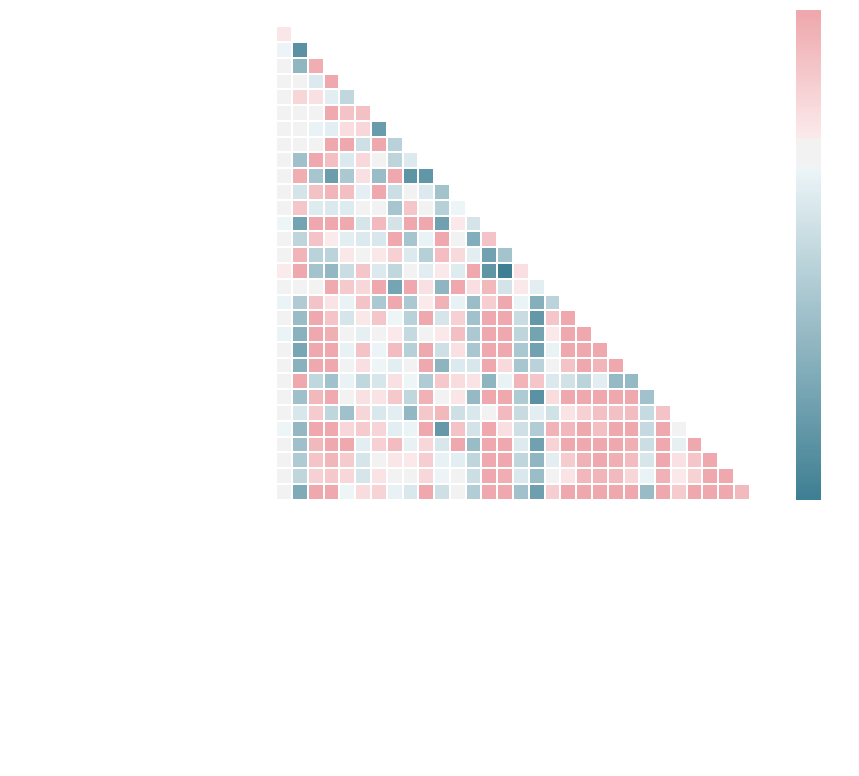

In [8]:
d = dataset

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True,fmt='.2f', linewidths=1, cbar_kws={"shrink": 1})

#sns.set_style("darkgrid")

# Can also add image below if you want of the heatmap

In [9]:
# # Scatterplot Matrix
# import matplotlib.pyplot as plt
# import pandas
# from pandas.plotting import scatter_matrix
# scatter_matrix(dataset)
# plt.show()

Smoking and mortality: 0.497063
Drinking and mortality -0.382172
Adult smoking is positiverly correlated with morality and drinking is negatively correlated


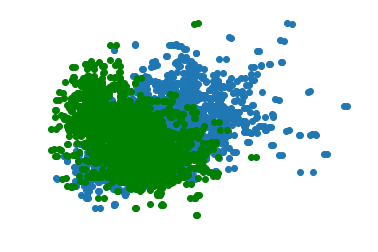

In [10]:
e = dataset['health__pct_adult_smoking']
f = dataset['health__pct_excessive_drinking']
b = dataset['heart_disease_mortality_per_100k']
print 'Smoking and mortality: %f' %e.corr(b)
print 'Drinking and mortality %f' %f.corr(b)
print "Adult smoking is positiverly correlated with morality and drinking is negatively correlated"
plt.scatter(e,b) # smoking and mortality
plt.scatter(f,b,color='g') # Drinking and mortality
plt.show()

In [53]:
new_ds = dataset[['area__rucc','heart_disease_mortality_per_100k']]
new_ds.head(5)

,area__rucc,heart_disease_mortality_per_100k
0,Metro - Counties in metro areas of fewer than ...,312
1,Metro - Counties in metro areas of fewer than ...,257
2,Metro - Counties in metro areas of 1 million p...,195
3,"Nonmetro - Urban population of 2,500 to 19,999...",218
4,"Nonmetro - Urban population of 2,500 to 19,999...",355


In [54]:
new_ds['area__rucc'][4][:1]

'N'

In [82]:
metro_ds = new_ds
non_metro_ds = new_ds
for ix in range(len(new_ds)-1):
    if metro_ds['area__rucc'][ix][:1] != 'M':
        #metro_ds.drop(metro_ds.index[[ix,ix+1]])
        metro_ds = metro_ds.drop(index=ix)
    else:
        non_metro_ds = non_metro_ds.drop(index=ix)

In [94]:
print len(metro_ds)
print len(non_metro_ds)
print len(metro_ds) + len(non_metro_ds)

print metro_ds.median()
print non_metro_ds.median()
# non-metro median > metro median

1129
2070
3199
heart_disease_mortality_per_100k    261.0
dtype: float64
heart_disease_mortality_per_100k    282.0
dtype: float64


In [95]:
dataset.head(3)

,row_id,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,...,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,yr,heart_disease_mortality_per_100k
0,0,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Manufacturing-dependent,0.408,0.057,0.254,0.066,0.516,0.235,...,0.089,NaN,0.332,13.0,2.80,15.09,1650.0,1489.0,a,312
1,1,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Mining-dependent,0.556,0.039,0.260,0.143,0.503,0.272,...,0.082,0.181,0.265,10.0,2.30,19.79,2010.0,2480.0,a,257
2,4,Metro - Counties in metro areas of 1 million p...,Large-in a metro area with at least 1 million ...,Nonspecialized,0.541,0.057,0.070,0.023,0.522,0.179,...,0.098,0.195,0.209,10.0,9.31,3.14,629.0,690.0,b,195


In [141]:
age_population_ds = dataset[['area__rucc','heart_disease_mortality_per_100k','demo__pct_aged_65_years_and_older']]
# counties having 20% people with age > 65

newer_ds = dataset[['area__rucc','heart_disease_mortality_per_100k','demo__pct_aged_65_years_and_older']]
age_metro_ds = newer_ds
age_non_metro_ds = newer_ds

for ix in range(len(newer_ds)-1):
    if age_metro_ds['area__rucc'][ix][:1] != 'M':
        #metro_ds.drop(metro_ds.index[[ix,ix+1]])
        age_metro_ds = age_metro_ds.drop(index=ix)
    else:
        age_non_metro_ds = age_non_metro_ds.drop(index=ix)

In [142]:
age_metro_ds.head(5)

,area__rucc,heart_disease_mortality_per_100k,demo__pct_aged_65_years_and_older
0,Metro - Counties in metro areas of fewer than ...,312,0.176
1,Metro - Counties in metro areas of fewer than ...,257,0.101
2,Metro - Counties in metro areas of 1 million p...,195,0.115
7,"Metro - Counties in metro areas of 250,000 to ...",315,0.134
13,"Metro - Counties in metro areas of 250,000 to ...",213,0.137


In [148]:
age_metro_ds_2 = age_metro_ds
age_metro_ds_2 = age_metro_ds_2.reset_index()
age_metro_ds_2 = age_metro_ds_2.drop('index',axis=1)

In [158]:
old_age_metro_ds = age_metro_ds_2
young_age_metro_ds = age_metro_ds_2
old_age_metro_ds = old_age_metro_ds.reset_index()
young_age_metro_ds = young_age_metro_ds.reset_index()
old_age_metro_ds = old_age_metro_ds.drop('index',axis=1)
young_age_metro_ds = young_age_metro_ds.drop('index',axis=1)
old_age_metro_ds.head(5)

,area__rucc,heart_disease_mortality_per_100k,demo__pct_aged_65_years_and_older
0,Metro - Counties in metro areas of fewer than ...,312,0.176
1,Metro - Counties in metro areas of fewer than ...,257,0.101
2,Metro - Counties in metro areas of 1 million p...,195,0.115
3,"Metro - Counties in metro areas of 250,000 to ...",315,0.134
4,"Metro - Counties in metro areas of 250,000 to ...",213,0.137


In [159]:
for ix in range(len(age_metro_ds_2)):
    if (old_age_metro_ds['demo__pct_aged_65_years_and_older'][ix]) > 0.2:
        # inside old and droppping old hence young
        young_age_metro_ds = young_age_metro_ds.drop(index=ix)
    else:
        old_age_metro_ds = old_age_metro_ds.drop(index=ix)

In [170]:
print young_age_metro_ds.median()
print old_age_metro_ds.median()
# counties with older population have lower median mortality rate

heart_disease_mortality_per_100k     263.000
demo__pct_aged_65_years_and_older      0.144
dtype: float64
heart_disease_mortality_per_100k     250.000
demo__pct_aged_65_years_and_older      0.222
dtype: float64


In [166]:
age_non_metro_ds_2 = age_non_metro_ds
age_non_metro_ds_2 = age_non_metro_ds_2.reset_index()
age_non_metro_ds_2 = age_non_metro_ds_2.drop('index',axis=1)

old_age_non_metro_ds = age_non_metro_ds_2
young_age_non_metro_ds = age_non_metro_ds_2
old_age_non_metro_ds = old_age_non_metro_ds.reset_index()
young_age_non_metro_ds = young_age_non_metro_ds.reset_index()
old_age_non_metro_ds = old_age_non_metro_ds.drop('index',axis=1)
young_age_non_metro_ds = young_age_non_metro_ds.drop('index',axis=1)

for ix in range(len(age_non_metro_ds_2)):
    if (old_age_non_metro_ds['demo__pct_aged_65_years_and_older'][ix]) > 0.2:
        # inside old and droppping old hence young
        young_age_non_metro_ds = young_age_non_metro_ds.drop(index=ix)
    else:
        old_age_non_metro_ds = old_age_non_metro_ds.drop(index=ix)

In [169]:
print young_age_non_metro_ds.median()
print old_age_non_metro_ds.median()

heart_disease_mortality_per_100k     294.000
demo__pct_aged_65_years_and_older      0.164
dtype: float64
heart_disease_mortality_per_100k     254.000
demo__pct_aged_65_years_and_older      0.227
dtype: float64
